<a href="https://colab.research.google.com/github/ahmedtarek-/MI_2022/blob/main/Exercise_011/MI11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Intelligence 11

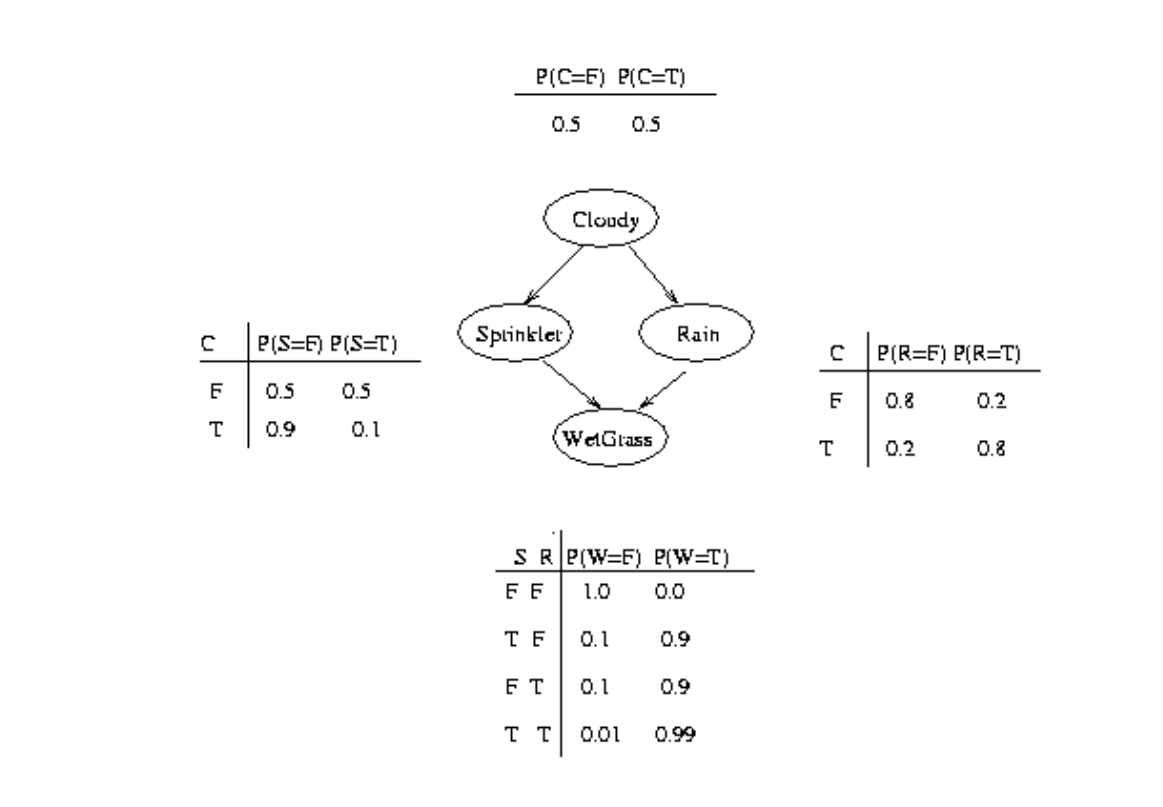

In [1]:
from IPython.display import Image
Image('/content/Screen Shot 2023-02-02 at 12.00.09 AM.png')


### 0) Download and import PGmPY

In [ ]:
!pip install pgmpy
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

### 1) Define the model

In [19]:

# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianNetwork([('C', 'S'), ('C', 'R'), ('S', 'W'), ('R', 'W')])

# Defining individual CPDs.
cpd_c = TabularCPD(variable='C', variable_card=2, values=[[0.5], [0.5]])


cpd_s = TabularCPD(variable='S', variable_card=2,
                   values=[[0.5, 0.9],
                           [0.5, 0.1]],
                  evidence=['C'],
                  evidence_card=[2])

cpd_r = TabularCPD(variable='R', variable_card=2,
                   values=[[0.8, 0.2],
                           [0.2, 0.8]],
                  evidence=['C'],
                  evidence_card=[2])

cpd_w = TabularCPD(variable='W', variable_card=2,
                   values=[[1.0, 0.1, 0.1, 0.01],
                           [0.0, 0.9, 0.9, 0.99]],
                  evidence=['S', 'R'],
                  evidence_card=[2,2])

### 2) Check the model

In [20]:
# Associating the CPDs with the network
model.add_cpds(cpd_c, cpd_s, cpd_r, cpd_w)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly
# defined and sum to 1.
model.check_model()

True

In [22]:
model.get_cardinality('W')
print(model.get_cpds('W'))

+------+------+------+------+------+
| S    | S(0) | S(0) | S(1) | S(1) |
+------+------+------+------+------+
| R    | R(0) | R(1) | R(0) | R(1) |
+------+------+------+------+------+
| W(0) | 1.0  | 0.1  | 0.1  | 0.01 |
+------+------+------+------+------+
| W(1) | 0.0  | 0.9  | 0.9  | 0.99 |
+------+------+------+------+------+


### 3) Doin some inference

_a. What's probability of sprinkler ON after observing that glass is wet_

In [25]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

print(infer.query(['S'], evidence={'W': 1}))

+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.9379 |
+------+----------+
| S(1) |   0.0621 |
+------+----------+


_b. What about if the has rained recently? (should be less)_ 

In [26]:
print(infer.query(['S'], evidence={'W': 1, 'R': 1}))

+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8055 |
+------+----------+
| S(1) |   0.1945 |
+------+----------+
